# Week 4b - Model Evaluation (29/09/2025)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

## Previous class: CNN for image classification

In [2]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root="./data", train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flattening
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    print(f"Epoch {epoch+1}, Loss = {avg_loss:.4f}")

Epoch 1, Loss = 0.1127
Epoch 2, Loss = 0.0554
Epoch 3, Loss = 0.0478
Epoch 4, Loss = 0.0421
Epoch 5, Loss = 0.0387
Epoch 6, Loss = 0.0388
Epoch 7, Loss = 0.0399
Epoch 8, Loss = 0.0367
Epoch 9, Loss = 0.0338
Epoch 10, Loss = 0.0346


In [5]:
test_data = datasets.MNIST(root="./data", train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8, shuffle=False)

correct = 0
total = 0
test_loss = 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = (correct / total) * 100

print(f"\nFinal Test Accuracy: {test_acc:.3f}")


Final Test Accuracy: 98.760


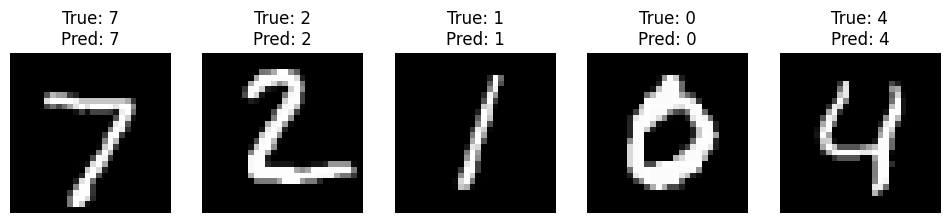

In [6]:
model.eval()

# Get the first 5 test images and labels
images, labels = next(iter(test_loader))

images = images.to(device)
labels = labels.to(device)

# Get predictions
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].cpu().squeeze(), cmap="gray")
    plt.title(f"True: {labels[i].item()}\nPred: {preds[i].item()}")
    plt.axis("off")

plt.show()

## Model evaluation

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

#### Using example y_true and y_pred

In [8]:
y_true = [0, 0, 1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 0, 1, 0, 1]

cm = confusion_matrix(y_true, y_pred)
cm

array([[2, 2],
       [1, 3]])

In [9]:
y_true = [0, 1, 2, 2, 0, 1, 2]
y_pred = [0, 0, 2, 2, 0, 2, 1]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[2, 0, 0],
       [1, 0, 1],
       [0, 1, 2]])

In [10]:
# Metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="micro")
rec = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5714
Precision: 0.5714
Recall: 0.5556
F1 Score: 0.4889


#### Using y_true and y_pred from our MNIST classification model

In [11]:
y_true = []
y_pred = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


In [12]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 976,    0,    0,    0,    0,    2,    1,    1,    0,    0],
       [   0, 1125,    0,    4,    0,    2,    2,    1,    1,    0],
       [   2,    6, 1011,    6,    1,    0,    0,    2,    4,    0],
       [   0,    0,    0, 1005,    0,    2,    0,    3,    0,    0],
       [   0,    0,    0,    0,  968,    0,    4,    1,    5,    4],
       [   0,    0,    1,    7,    0,  881,    1,    1,    1,    0],
       [   4,    3,    0,    1,    1,    1,  944,    0,    4,    0],
       [   0,    1,    3,    2,    1,    0,    0, 1017,    2,    2],
       [   2,    0,    3,    1,    0,    1,    0,    0,  965,    2],
       [   2,    2,    0,    2,   10,    4,    0,    1,    4,  984]])

In [13]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="macro")
rec = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9876
Precision: 0.9876
Recall: 0.9876
F1 Score: 0.9876


In [14]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## How to improve a model?

#### Using batch size > 1

##### Example: batch size = 4

In [15]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    print(f"Epoch {epoch+1}, Loss = {avg_loss:.4f}")

Epoch 1, Loss = 0.1106
Epoch 2, Loss = 0.0428
Epoch 3, Loss = 0.0310
Epoch 4, Loss = 0.0245
Epoch 5, Loss = 0.0187
Epoch 6, Loss = 0.0164
Epoch 7, Loss = 0.0151
Epoch 8, Loss = 0.0137
Epoch 9, Loss = 0.0123
Epoch 10, Loss = 0.0131


In [17]:
y_true = []
y_pred = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="macro")
rec = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9894
Precision: 0.9894
Recall: 0.9892
F1 Score: 0.9893


##### Example: batch size = 8

In [18]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    print(f"Epoch {epoch+1}, Loss = {avg_loss:.4f}")

Epoch 1, Loss = 0.1083
Epoch 2, Loss = 0.0386
Epoch 3, Loss = 0.0268
Epoch 4, Loss = 0.0189
Epoch 5, Loss = 0.0153
Epoch 6, Loss = 0.0129
Epoch 7, Loss = 0.0099
Epoch 8, Loss = 0.0092
Epoch 9, Loss = 0.0084
Epoch 10, Loss = 0.0076


In [20]:
y_true = []
y_pred = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="macro")
rec = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9902
Precision: 0.9901
Recall: 0.9900
F1 Score: 0.9901


#### Using dropout layer

In [21]:
class CNNDropout(nn.Module):
    def __init__(self):
        super(CNNDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(p=0.2)
        self.dropout2 = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(x.size(0), -1)  # Flattening
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)

        return x

In [22]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)

device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNNDropout().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()

        # Forward pass
        preds = model(images)
        loss = criterion(preds, labels)

        # Backward pass
        loss.backward()

        # Update the weights and biases
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    print(f"Epoch {epoch+1}, Loss = {avg_loss:.4f}")

Epoch 1, Loss = 0.2154
Epoch 2, Loss = 0.0953
Epoch 3, Loss = 0.0745
Epoch 4, Loss = 0.0644
Epoch 5, Loss = 0.0539
Epoch 6, Loss = 0.0485
Epoch 7, Loss = 0.0450
Epoch 8, Loss = 0.0455
Epoch 9, Loss = 0.0389
Epoch 10, Loss = 0.0401


In [23]:
y_true = []
y_pred = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="macro")
rec = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9917
Precision: 0.9916
Recall: 0.9916
F1 Score: 0.9916


#### Data Augmentation

In [24]:
from PIL import Image


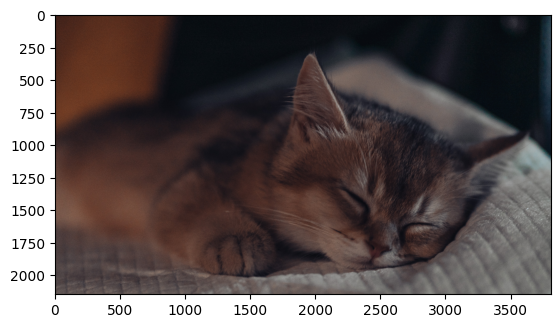

In [25]:
image_path = "./sleeping_kitten.jpg"
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.show()

##### Random Crop

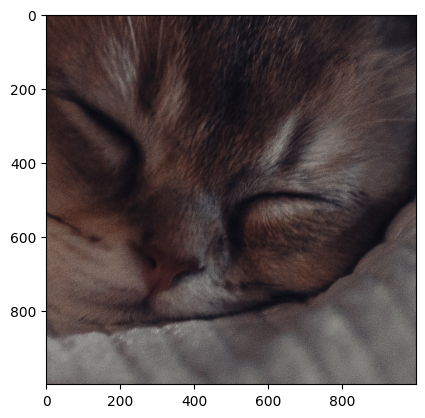

In [26]:
image_path = "./sleeping_kitten.jpg"
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.RandomCrop(size=(1000, 1000)),
    transforms.ToTensor()
])

image = transform(image)

plt.imshow(image.permute(1, 2, 0))
plt.show()

##### Change brightness, contrast, and saturation

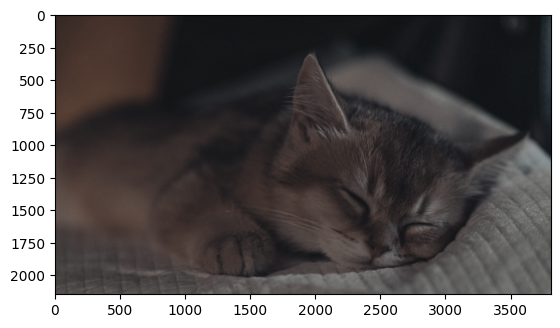

In [27]:
image_path = "./sleeping_kitten.jpg"
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.ColorJitter(brightness=0, contrast=0.5, saturation=0.5),
    transforms.ToTensor()
])

image = transform(image)

plt.imshow(image.permute(1, 2, 0))
plt.show()

##### Random Flip

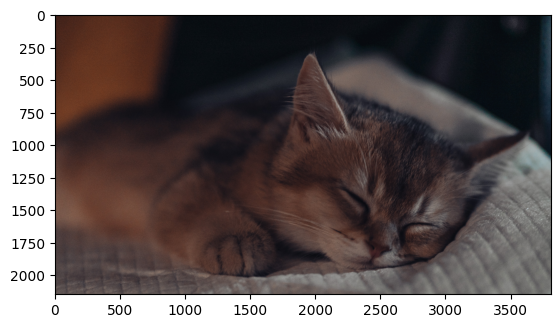

In [28]:
image_path = "./sleeping_kitten.jpg"
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

image = transform(image)

plt.imshow(image.permute(1, 2, 0))
plt.show()

##### Random rotation

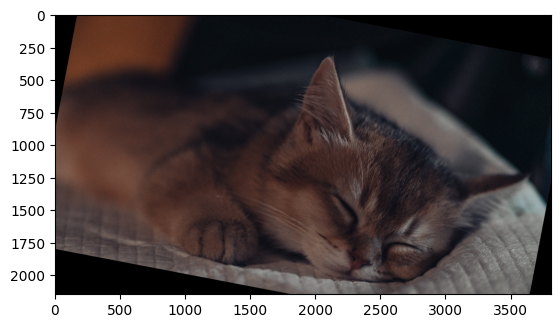

In [29]:
image_path = "./sleeping_kitten.jpg"
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor()
])

image = transform(image)

plt.imshow(image.permute(1, 2, 0))
plt.show()